# Naive bayes classifier.

> It is a supervised ML alogo used to solve classification problem using the concept of bayes theorem.

>note : Naive bayes is completely based on bayes theorem and bayes theorem is completely based on 
conditional probability 


>It is a probabilistic classifier which means it predicts on the basis of probability of an object.

>Applications of Naive Bayes classifier -: Text classification , Sentimental analysis.

# Question : today i can play cricket or not

In [ ]:
Given : p(a) = 0.64 , p(sunny) = 0.35

In [1]:
3/9

0.3333333333333333

In [ ]:
p(yes|sunny) = p(sunny|yes)* p(yes)
              -----------------------
                    p(sunny)
        
p(yes|sunny) = 0.3 * 0.64
               ----------------
                     0.35
        
            = 0.54

In [3]:
0.3 * 0.64 

0.192

In [4]:
0.192/0.35

0.5485714285714286

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [53]:
df = pd.read_table(r"C:\Users\hp\OneDrive\Desktop\machine learning\Navie bayes\smsspamcollection.tsv")

In [54]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [56]:
df["label"].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [57]:
df["message"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [58]:
!pip install wordcloud

In [59]:
from wordcloud import WordCloud
wc = WordCloud()

In [60]:
df[df["label"]== "spam"]

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


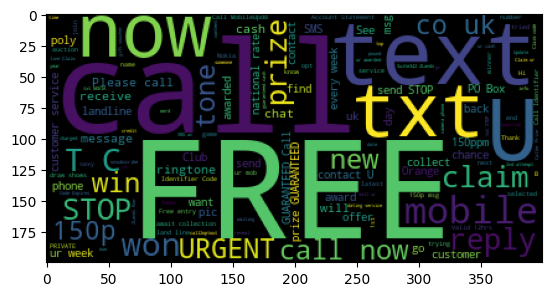

In [61]:
wc.generate(" ".join(df[df["label"]== "spam"]["message"]))
plt.imshow(wc)
plt.show()

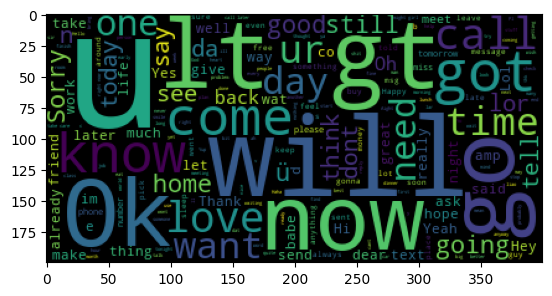

In [62]:
wc.generate(" ".join(df[df["label"]== "ham"]["message"]))
plt.imshow(wc)
plt.show()

In [63]:
x = df["message"]

In [64]:
y = df["label"]

In [65]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

# Count Vectorizer

In [66]:
msg=['i love python python',
     'python is fun', 
     'python love datascience',
     'datascience is fun']

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [68]:
newx = cv.fit_transform(msg)

In [69]:
newx

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [70]:
newx = cv.fit_transform(msg).toarray()

In [71]:
newx

array([[0, 0, 0, 1, 2],
       [0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0]], dtype=int64)

In [72]:
msg=['i love python python','python is fun', 'python love datascience','datascience is fun']

In [73]:
cv.get_feature_names_out()

array(['datascience', 'fun', 'is', 'love', 'python'], dtype=object)

# Types of Naive Bayes -:

>1)Bernoulli NB -: solves binary classification where you have 2 categories i.e. yes or no.

>2)Multinomial NB-: solves multiclass classification problem where you have more than 2 classes and it also solves problem of binary classification which has imbalance classes.

>3)Guassian NB -: if you have continious data in your columns or you have numeric features which exhibit normal distribution the Guassian NB is the correct choice.

In [74]:
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(x).toarray()

In [76]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [77]:
cv.get_feature_names_out()

array(['00', '000', '000pes', ..., 'èn', 'ú1', '〨ud'], dtype=object)

In [78]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest= train_test_split(x , y , test_size = 0.30, random_state = 1)

In [79]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report

In [82]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    training_score = model.score(xtrain,ytrain)
    testing_score = model.score(xtest,ytest)
    
    print(f"Traning Score: {training_score} \n\n Testing Score: {testing_score}\n")
    print(classification_report(ytest,ypred))
    return model

In [83]:
mymodel(BernoulliNB())

Traning Score: 0.9851282051282051 

 Testing Score: 0.9796650717703349

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1442
        spam       0.97      0.88      0.92       230

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



BernoulliNB()

In [84]:
mymodel(MultinomialNB())

Traning Score: 0.9925641025641025 

 Testing Score: 0.9838516746411483

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1442
        spam       0.94      0.94      0.94       230

    accuracy                           0.98      1672
   macro avg       0.97      0.97      0.97      1672
weighted avg       0.98      0.98      0.98      1672



MultinomialNB()

In [85]:
mymodel(GaussianNB())

Traning Score: 0.9571794871794872 

 Testing Score: 0.9013157894736842

              precision    recall  f1-score   support

         ham       0.99      0.90      0.94      1442
        spam       0.59      0.92      0.72       230

    accuracy                           0.90      1672
   macro avg       0.79      0.91      0.83      1672
weighted avg       0.93      0.90      0.91      1672



GaussianNB()